In [1]:
import pathlib
from skimage import io, color, transform, exposure, feature, segmentation, filters
from skimage.future import graph
import skimage
import numpy as np
import fluke
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 12)

In [2]:
p = pathlib.Path('/home/dlfelps/PycharmProjects/happywhale/demo')
files = [x for x in p.iterdir()]

In [3]:
def get_xy(file):
    temp = io.imread(file)
    s = temp.shape
    return (s[0], s[1])

In [4]:
xy = [get_xy(f) for f in files]
x,y = zip(*xy)


In [93]:
def im_loader(file, img_num):
    # custom image loader to be passed to imread_collection
    out = io.imread(file)
    s = out.shape
    
    def color_t(out):
        # if 3-channel image, then convert to HSV and take V
        # if 1-channel image, do nothing
        if len(s) == 3 :
            #rgb to hsv
            out = color.rgb2hsv(out)
            out = out[:,:,2] # take "v"
        return out
    
    #out = color_t(out)
    
   
    def size_t(out):
        # downsample to around 250 horizontal pixels
        #first calculate downsample factor
        down = s[1] // 100
        if down > 1 :
            out = transform.pyramid_reduce(out, downscale=down)
            out = 255*out
            out = out.astype('uint8')
        return out
    
    out = size_t(out)
    
    def exposure_t(img):
        p2, p98 = np.percentile(img, (2, 98))
        img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
        return img

    out = exposure_t(out)
    
    def segment_t(img):
        labels1 = segmentation.slic(img, compactness=100, n_segments=200)
        out1 = color.label2rgb(labels1, img, kind='avg')
        g = graph.rag_mean_color(img, labels1)
        labels2 = graph.cut_threshold(labels1, g, 1)
        out2 = color.label2rgb(labels2, img, kind='avg')
        return out1
    
    #out = segment_t(out)
        
        
    return out

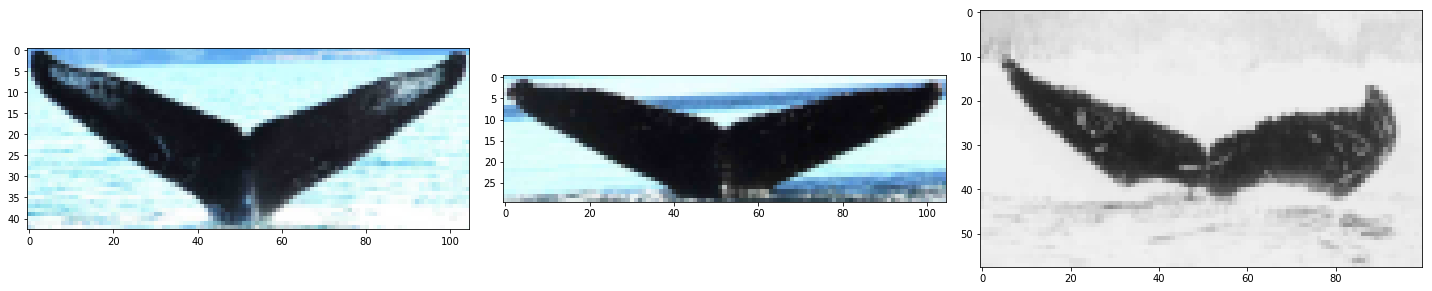

In [94]:
#ic = io.imread_collection(files, conserve_memory=False, plugin='pil', plugin_args={'load_func': im_loader})
ic = io.ImageCollection('/home/dlfelps/PycharmProjects/happywhale/easy/*f.jpg', load_func=im_loader)
io.imshow_collection(ic)

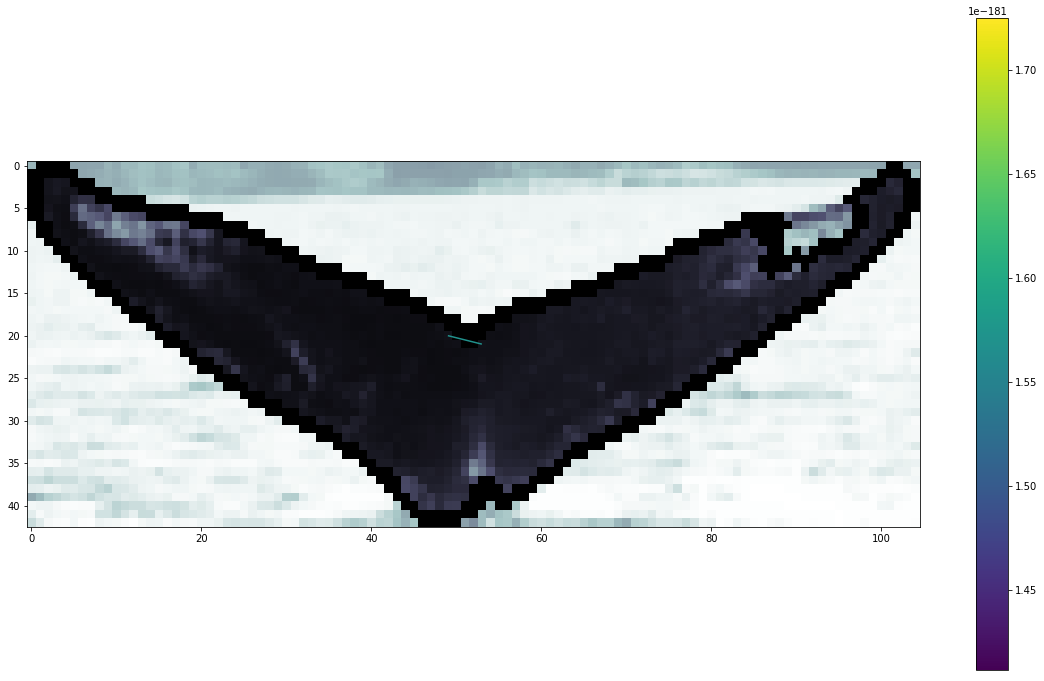

In [91]:
img = ic[0]
labels1 = segmentation.slic(img, compactness=.1, n_segments=2)


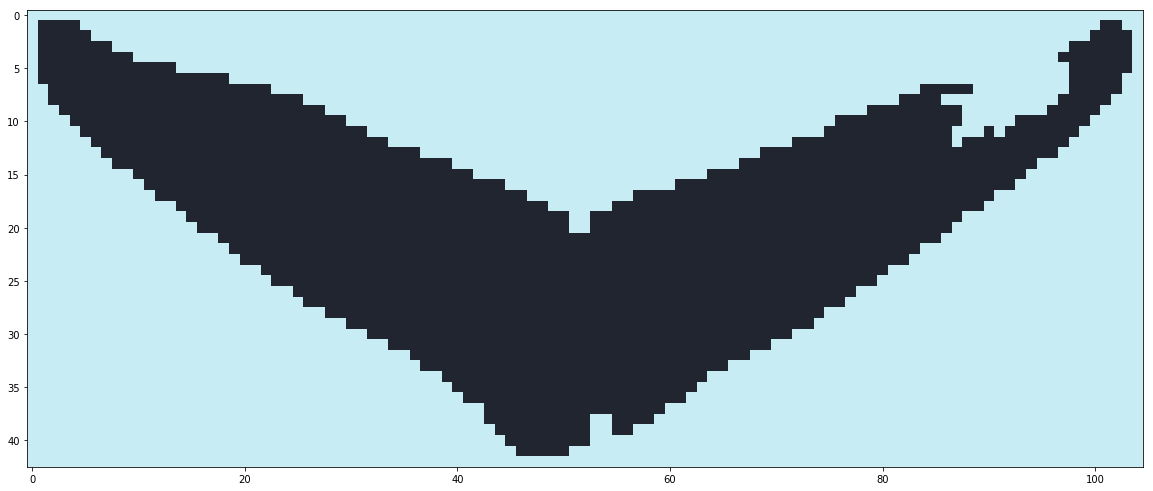

In [101]:
#labels2 = graph.cut_normalized(labels1, g)
out = color.label2rgb(labels1, img, kind='avg')
plt.imshow(out)

In [108]:
[fluke.gen_features(labels1 == 0), fluke.gen_features(labels1 == 1)]



[[2888.0,
  -132.0,
  570632.0,
  2912.0,
  -41086.0,
  432899.0,
  3117176.0,
  6559998.0,
  517225787.5],
 [1627.0,
  -2125.5,
  125806.75,
  -5169.5,
  42214.75,
  -781118.375,
  1031732.75,
  -8634452.375,
  122743387.1875]]